Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem
https://projecteuler.net/

The problem chosen is Problem 25: 1000-digit Fibonacci Number. Where it asks, "What is the index of the first term in the Fibonacci sequence to contain 1000 digits?

In [2]:
# your code here
import math
import numpy as np
#Fibonacci sequence Fn = Fn-1 + Fn-2 where F1 = 1 and F2 = 1
F = np.array([], dtype = object)
F = np.append(F, 1)
F = np.append(F, 1)
desired_digit = 1000
length = 1
n = 2
while length < desired_digit:
  new_value = F[n-1] + F[n-2]
  F = np.append(F, new_value)
  length = math.floor(math.log10(abs(new_value)))+1
  n += 1
print("First value with", desired_digit, "digits (Fn):", F[n-1])
print("Fn digit size:", math.floor(math.log10(abs(F[n-1])))+1)
print("Fn-1:", F[n-2])
print("Fn-1 digit size:", math.floor(math.log10(abs(F[n-2])))+1)
print("Fn-2:", F[n-3])
print("Fn-2 digit size:", math.floor(math.log10(abs(F[n-3])))+1)
print("n:", n)

First value with 1000 digits (Fn): 10700662663827589367649805844573968850836838966321516650132352033753145206046940406218891475824897926578046948881775919574843364666725699595129960304612627480924821861440694330512347744427502737817530875793916661921492591867595539664228371489431130746995034395470019854326097230672901928705264472437261177158218255484911205250132014786129659313817922355596574520395061375514678375432291196021299340482607061753977068470682028954869026661854351245219003694806413574474709117076197669456910700980243934396174741037369125032313655321647736970231677550515951735184605799549194109677783732296657965816465139034881542563101842241902598460880001101862555502454939371136516570394476295847145485234259504285824253060835444354282126110089928637950480068943303097732178348645431132057656598684562886168087186938352973506439862976406600007235629179052070511640776148124918858309459405666883391093509444565763576661516193177537928916615813271596168774879838218204925203484738743

# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [4]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


R2 training: 0.6088968118672871 R2 testing: 0.5943232652466202
MAE training: 0.530874354486376 MAE testing: 0.535126133655451
RSME training: 0.7234924745376035 RSME testing: 0.7273129773603114


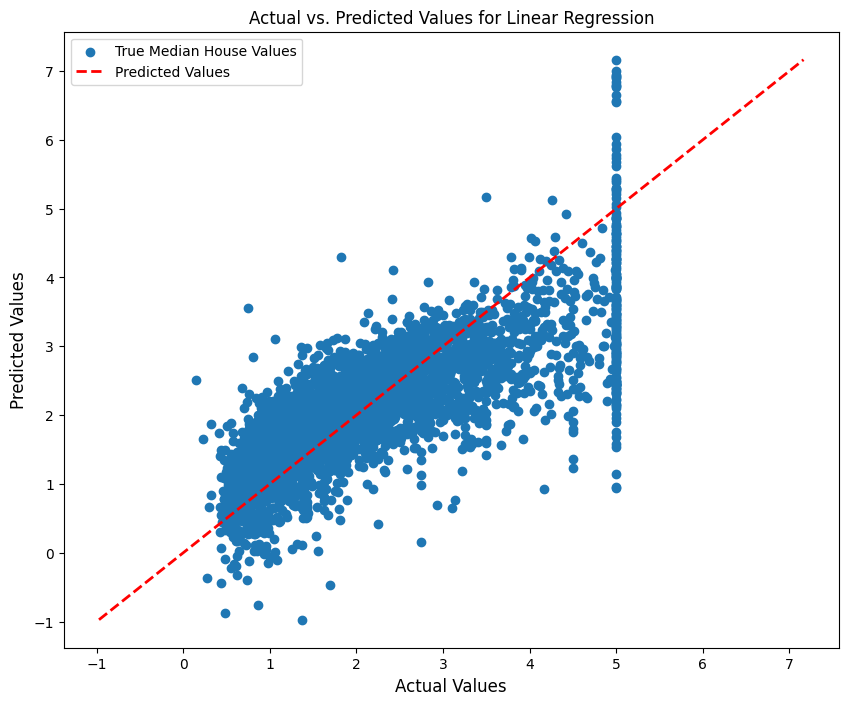

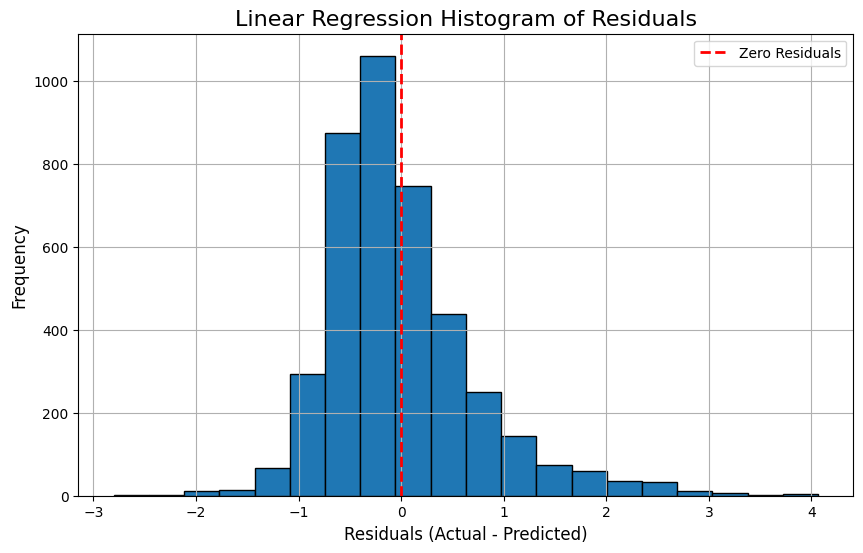

Standardized Coefficients (Feature Importance):
AveBedrms     0.593215
MedInc        0.433333
HouseAge      0.009293
Population   -0.000008
AveOccup     -0.004745
AveRooms     -0.098643
Latitude     -0.421449
Longitude    -0.434166
dtype: float64
R2 training: 0.6088967772220122 R2 testing: 0.5943075006070294
MAE training: 0.5308837552298858 MAE testing: 0.5351390745289072
RMSE training: 0.723492506582337 RMSE testing: 0.7273271089515354


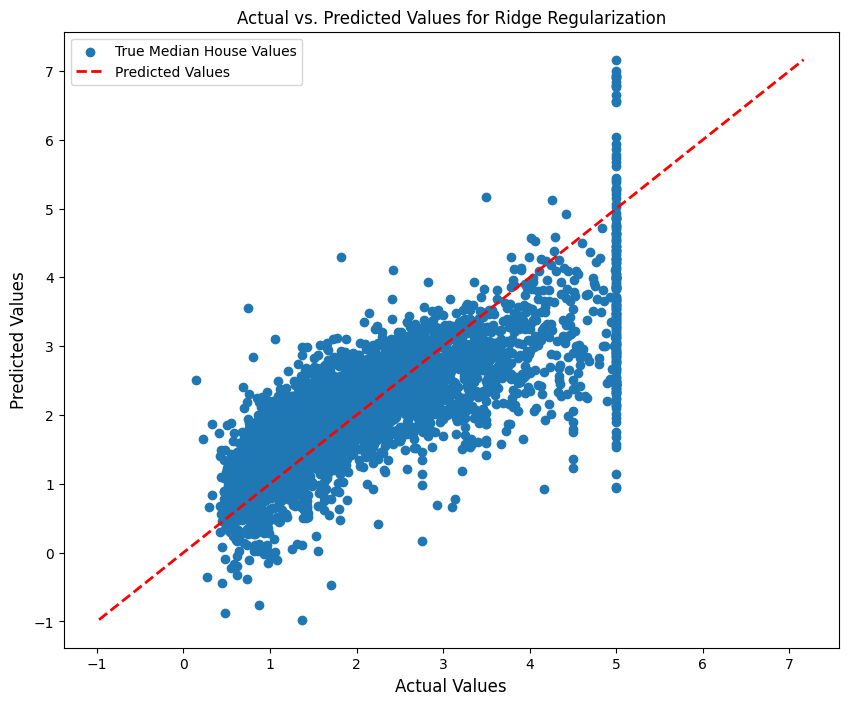

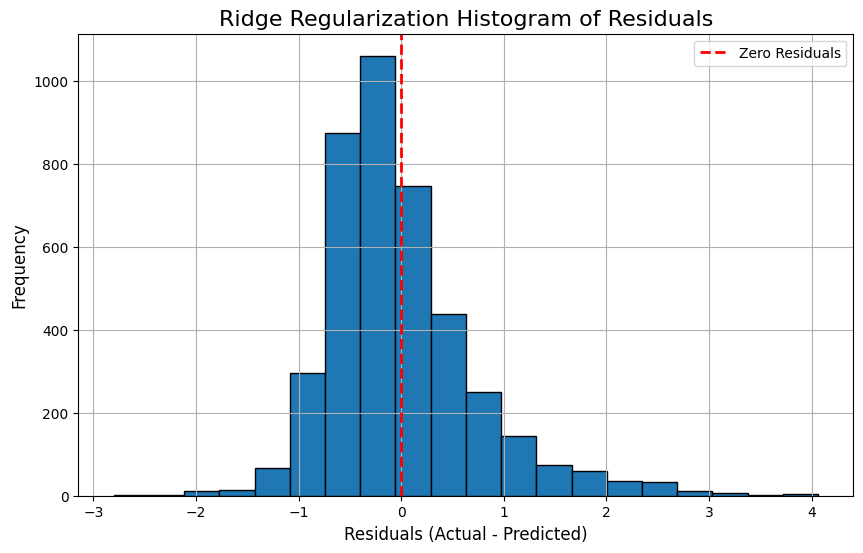

Standardized Coefficients (Feature Importance):
AveBedrms     0.592088
MedInc        0.433222
HouseAge      0.009295
Population   -0.000008
AveOccup     -0.004746
AveRooms     -0.098428
Latitude     -0.421424
Longitude    -0.434125
dtype: float64


In [18]:
# your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import Ridge
#fit the Linear Regression Model to the training data
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

#Evaluate the results using R2, MAE, and RSME
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rsme_train = root_mean_squared_error(y_train, y_train_pred)
rsme_test = root_mean_squared_error(y_test, y_test_pred)
print("R2 training:", r2_train, "R2 testing:", r2_test)
print("MAE training:", mae_train, "MAE testing:", mae_test)
print("RSME training:", rsme_train, "RSME testing:", rsme_test)

#Plot fitted line and actual data points
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_test_pred, label = 'True Median House Values')
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], '--', color='red', linewidth=2, label='Predicted Values')
plt.title('Actual vs. Predicted Values for Linear Regression')
plt.xlabel('Actual Values', fontsize = 12)
plt.ylabel('Predicted Values', fontsize = 12)
plt.legend()
plt.savefig("linear_reg_scatterplt.png")
plt.show()

#Create histogram of model error
plt.figure(figsize=(10,6))
residuals = y_test-y_test_pred
plt.hist(residuals, bins=20, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=2, label = 'Zero Residuals')
plt.title('Linear Regression Histogram of Residuals', fontsize = 16)
plt.xlabel('Residuals (Actual - Predicted)', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend()
plt.grid(True)
plt.savefig("linear_reg_histogram.png")
plt.show()

#Use Standardized Coefficients to determine most important predictor variables
standardized_coeffs = pd.Series(reg.coef_, index=feature_names).sort_values(ascending = False)
print("Standardized Coefficients (Feature Importance):")
print(standardized_coeffs)

#testing logistic regression
#fit the Logistic Regression Model to the training data
ridge_model = Ridge().fit(X_train, y_train)
ridge_y_train_pred = ridge_model.predict(X_train)
ridge_y_test_pred = ridge_model.predict(X_test)

#Evaluate the results using R2, MAE, and RSME
ridge_r2_train = r2_score(y_train, ridge_y_train_pred)
ridge_r2_test = r2_score(y_test, ridge_y_test_pred)
ridge_mae_train = mean_absolute_error(y_train, ridge_y_train_pred)
ridge_mae_test = mean_absolute_error(y_test, ridge_y_test_pred)
ridge_rmse_train = root_mean_squared_error(y_train, ridge_y_train_pred)
ridge_rmse_test = root_mean_squared_error(y_test, ridge_y_test_pred)
print("R2 training:", ridge_r2_train, "R2 testing:", ridge_r2_test)
print("MAE training:", ridge_mae_train, "MAE testing:", ridge_mae_test)
print("RMSE training:", ridge_rmse_train, "RMSE testing:", ridge_rmse_test)

#Plot fitted line and actual data points
plt.figure(figsize=(10,8))
plt.scatter(y_test, ridge_y_test_pred, label = 'True Median House Values')
min_val = min(y_test.min(), ridge_y_test_pred.min())
max_val = max(y_test.max(), ridge_y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], '--', color='red', linewidth=2, label='Predicted Values')
plt.title('Actual vs. Predicted Values for Ridge Regularization')
plt.xlabel('Actual Values', fontsize = 12)
plt.ylabel('Predicted Values', fontsize = 12)
plt.legend()
plt.savefig("ridge_reg_scatterplt.png")
plt.show()

#Create histogram of model error
plt.figure(figsize=(10,6))
residuals = y_test-ridge_y_test_pred
plt.hist(residuals, bins=20, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=2, label = 'Zero Residuals')
plt.title('Ridge Regularization Histogram of Residuals', fontsize = 16)
plt.xlabel('Residuals (Actual - Predicted)', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend()
plt.grid(True)
plt.savefig("ridge_reg_histogram.png")
plt.show()

#Use Standardized Coefficients to determine most important predictor variables
standardized_coeffs = pd.Series(ridge_model.coef_, index=feature_names).sort_values(ascending = False)
print("Standardized Coefficients (Feature Importance):")
print(standardized_coeffs)


# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


Train Accuracy: 0.989010989010989 Test Accuracy: 0.9649122807017544
Train ROC AUC: 0.998266253869969 Test ROC AUC: 0.9933862433862434
Train Average Precision: 0.9988414524930678 Test Average Precision: 0.996034858620338


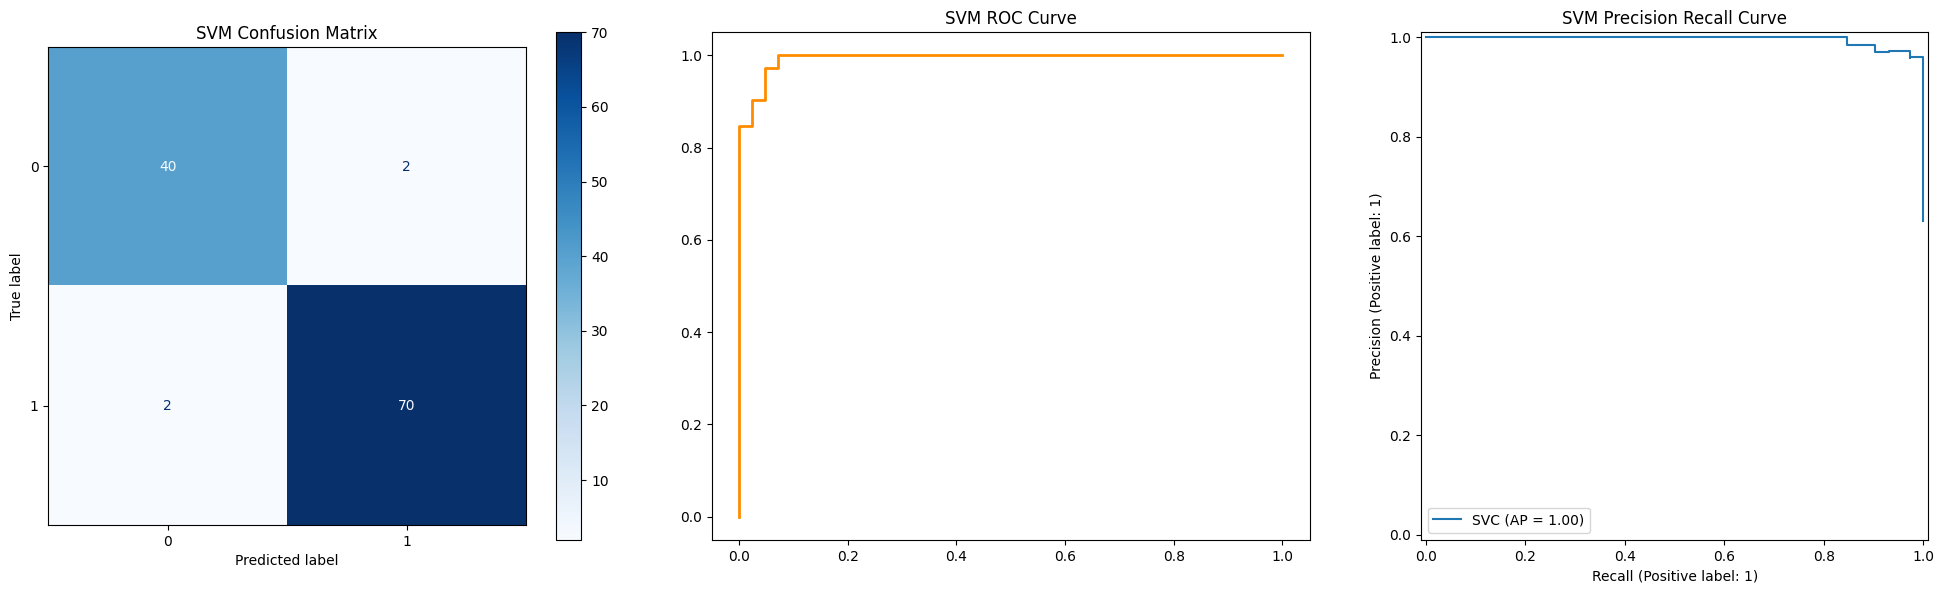


Most important predictor features (in descending order):
mean concavity
worst area
area error
worst texture
worst perimeter
mean area
radius error
symmetry error
mean radius
mean perimeter
mean texture
compactness error
worst concavity
worst radius
mean concave points
perimeter error
texture error
mean fractal dimension
fractal dimension error
worst symmetry
worst fractal dimension
concave points error
smoothness error
concavity error
worst concave points
worst smoothness
mean compactness
mean smoothness
worst compactness
mean symmetry
Train Accuracy: 0.9824175824175824 Test Accuracy: 0.956140350877193
Train ROC AUC: 0.998782249742002 Test ROC AUC: 0.970568783068783
Train Average Precision: 0.9988283800232334 Test Average Precision: 0.9671208343083343


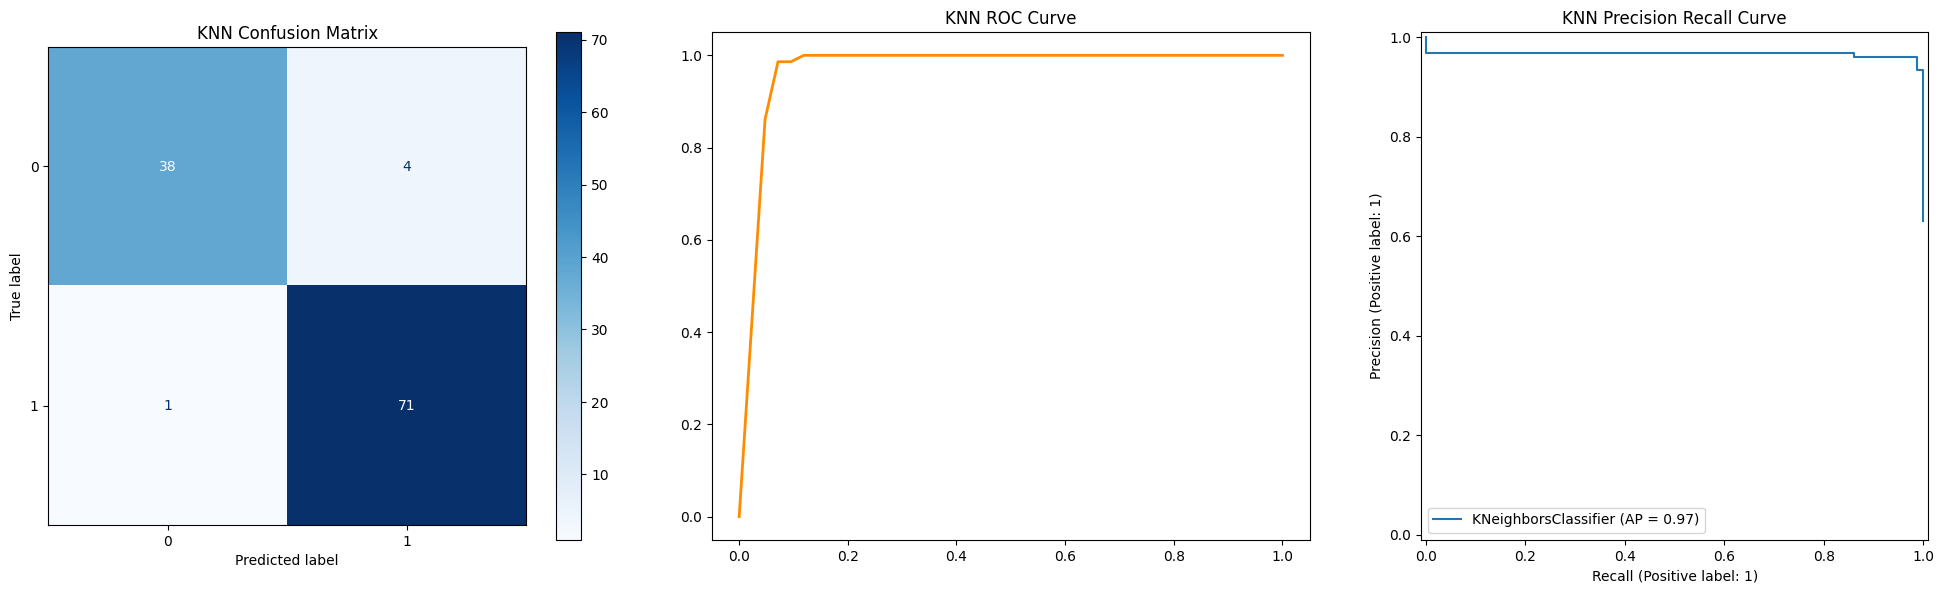


Most important predictor features (in descending order):
texture error
worst area
worst radius
worst texture
worst perimeter
worst compactness
smoothness error
mean compactness
concavity error
worst smoothness
area error
mean smoothness
compactness error
mean symmetry
mean fractal dimension
radius error
mean concavity
mean concave points
worst concave points
concave points error
symmetry error
perimeter error
mean perimeter
mean texture
mean radius
worst symmetry
fractal dimension error
mean area
worst fractal dimension
worst concavity


In [36]:
# your code here
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, PrecisionRecallDisplay
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
#SVM model
model = svm.SVC(kernel = 'rbf', C=1.0, gamma ='scale').fit(X_train_std, y_train)
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

#Evaluation metrics
y_train_scores = model.decision_function(X_train_std)
y_test_scores = model.decision_function(X_test_std)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_roc_auc = roc_auc_score(y_train, y_train_scores)
test_roc_auc = roc_auc_score(y_test, y_test_scores)
train_average_precision = average_precision_score(y_train, y_train_scores)
test_average_precision = average_precision_score(y_test, y_test_scores)
print("Train Accuracy:", train_accuracy, "Test Accuracy:", test_accuracy)
print("Train ROC AUC:", train_roc_auc, "Test ROC AUC:", test_roc_auc)
print("Train Average Precision:", train_average_precision, "Test Average Precision:", test_average_precision)

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize= (20,6))
#plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test_std, y_test, cmap = plt.cm.Blues, ax = ax1)
ax1.set_title("SVM Confusion Matrix")

#plot roc auc curve
fpr, tpr, _ = roc_curve(y_test, y_test_scores)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr, tpr, color="darkorange", lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
ax2.set_title("SVM ROC Curve")

#plot precision recall curve
PrecisionRecallDisplay.from_estimator(model, X_test_std, y_test, ax=ax3)
ax3.set_title("SVM Precision Recall Curve")

plt.tight_layout()
plt.savefig("SVM_plots.png")
plt.show()

#compute predictors importance
result = permutation_importance(model, X_test_std, y_test)
sorted_importances_idx = result.importances_mean.argsort()
sorted_importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns = X.columns[sorted_importances_idx]
)
top_features = X.columns[sorted_importances_idx][::-1]
print("\nMost important predictor features (in descending order):")
for feature in top_features:
  print(feature)

#KNN Model
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train_std, y_train)
knn_y_train_pred = knn_model.predict(X_train_std)
knn_y_test_pred = knn_model.predict(X_test_std)

#Evaluation Metrics
knn_y_train_scores = knn_model.predict_proba(X_train_std)[:,1]
knn_y_test_scores = knn_model.predict_proba(X_test_std)[:,1]
knn_train_accuracy = accuracy_score(y_train, knn_y_train_pred)
knn_test_accuracy = accuracy_score(y_test, knn_y_test_pred)
knn_train_roc_auc = roc_auc_score(y_train, knn_y_train_scores)
knn_test_roc_auc = roc_auc_score(y_test, knn_y_test_scores)
knn_train_average_precision = average_precision_score(y_train, knn_y_train_scores)
knn_test_average_precision = average_precision_score(y_test, knn_y_test_scores)
print("Train Accuracy:", knn_train_accuracy, "Test Accuracy:", knn_test_accuracy)
print("Train ROC AUC:", knn_train_roc_auc, "Test ROC AUC:", knn_test_roc_auc)
print("Train Average Precision:", knn_train_average_precision, "Test Average Precision:", knn_test_average_precision)

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize= (20,6))
#plot confusion matrix
ConfusionMatrixDisplay.from_estimator(knn_model, X_test_std, y_test, cmap= plt.cm.Blues, ax = ax1)
ax1.set_title("KNN Confusion Matrix")

#plot roc auc curve
fpr, tpr, _ = roc_curve(y_test, knn_y_test_scores)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr, tpr, color="darkorange", lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
ax2.set_title("KNN ROC Curve")

#plot precision recall curve
PrecisionRecallDisplay.from_estimator(knn_model, X_test_std, y_test, ax=ax3)
ax3.set_title("KNN Precision Recall Curve")

plt.tight_layout()
plt.savefig("KNN_plots.png")
plt.show()

#compute predictors importance
knn_result = permutation_importance(knn_model, X_test_std, y_test)
knn_sorted_importances_idx = knn_result.importances_mean.argsort()
knn_sorted_importances = pd.DataFrame(
    knn_result.importances[knn_sorted_importances_idx].T,
    columns = X.columns[knn_sorted_importances_idx]
)
knn_top_features = X.columns[knn_sorted_importances_idx][::-1]
print("\nMost important predictor features (in descending order):")
for feature in knn_top_features:
  print(feature)